# Supervised Learning: Decision Trees

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from IPython.display import display

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Overview

Decision Tree 도 다른 알고리즘들처럼 Classifier, Regressor 가 존재합니다.

다른 분류로는 tree.DecisionTree, ensemble.{RandomForest, GradientBoosting} 이 있습니다.

이 책에서는 Classifier 만 비교합니다.

| Algorithm | Desc |
|--|--|
| tree.DecisionTreeClassifier | 중요한 질문부터 안중요한 질문으로 모델 구성 |
| ensemble.RandomForestClassifier | DT에서 overfit 을 막기위한 한 방법. 여러 트리를 구성! Collection of Decision Trees with randomized values. |
| ensemble.GradientBoostingClassifier | DT에서 overfit 을 막기위한 한 방법. 여러 트리를 구성! 작은 (보통 5개 이하의 트리), where 각각 트리 생성에서 매 순간마다 그 전순간의 실수를 고침.|

다들 아시겠지만, DecisionTree는 정말 알기 쉽게 yes/no question을 계속 줘서 분류하는 알고리즘 입니다.

처음부터 "이렇게 나누면 가장 잘 나뉘는 질문이 뭔가"에서 시작해서, 점점 임팩트가 작아지는 질문을 계속 하는 것이죠.

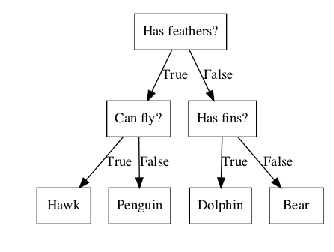

In [3]:
mglearn.plots.plot_animal_tree()

In [4]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
                feature_names=cancer.feature_names, impurity=False, filled=True);

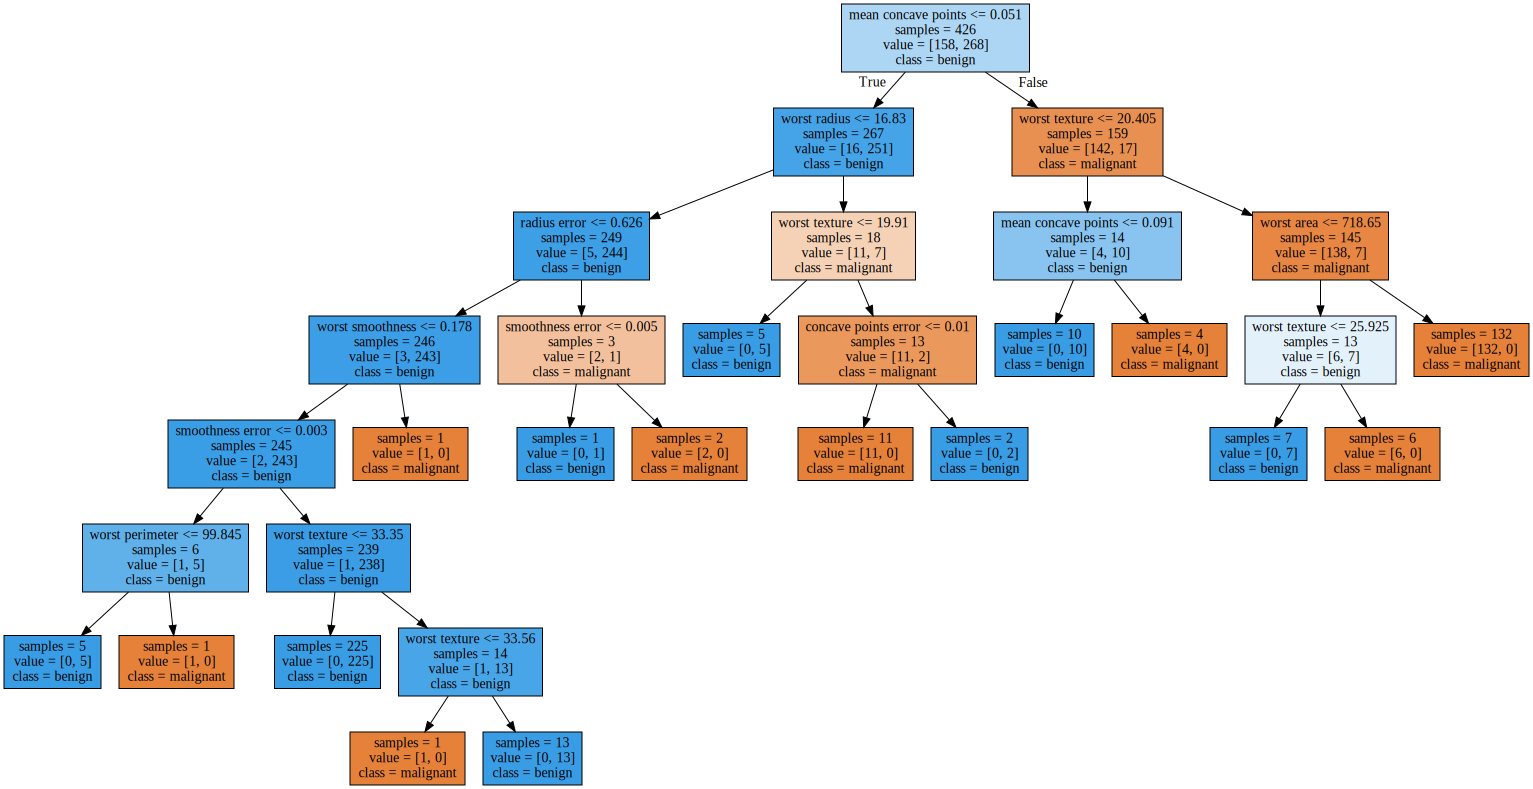

In [5]:
import graphviz

with open('tree.dot', 'r') as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

다른 방식으로 tree 구성후 어떤 feature 들이 중요하게 사용되었는지 볼 수 있습니다.

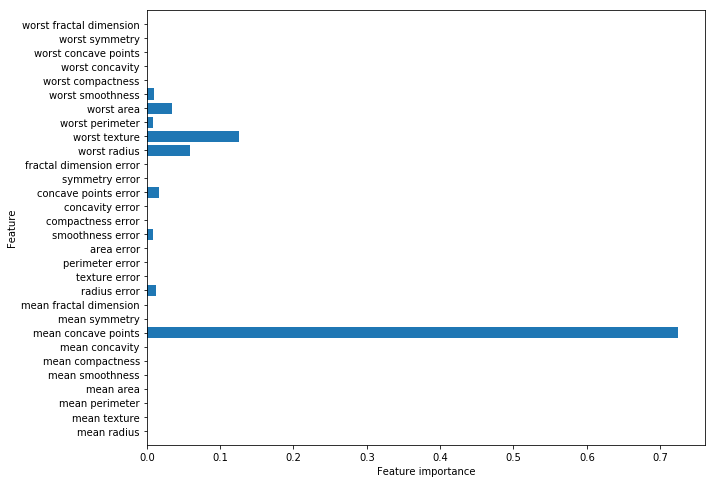

In [6]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

이제는 다른 Classifier 들과 비교를 해보겠습니다. `max_depth` 튜닝 등으로 더 좋은 결과를 얻을 수 있겠지만 간단히 비교만 하겠습니다.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def compare_tree_classification(X_train, X_test, y_train, y_test, title=None, ax=None):
    models = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              GradientBoostingClassifier()]

    def get_model_name(model):
        return model.__class__.__name__
    
    df = []
    for model in models:
        fit = model.fit(X_train, y_train)
        df.append([get_model_name(model), fit.score(X_train, y_train), fit.score(X_test, y_test)])

    df = pd.DataFrame(df, columns=['name', 'train', 'test'])

    ax.bar(df.index-0.1, df['train'], width=0.2)
    ax.bar(df.index+0.1, df['test'], width=0.2)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['name'])
    ax.legend(['train', 'test'])
    if title:
        ax.set_title(title)

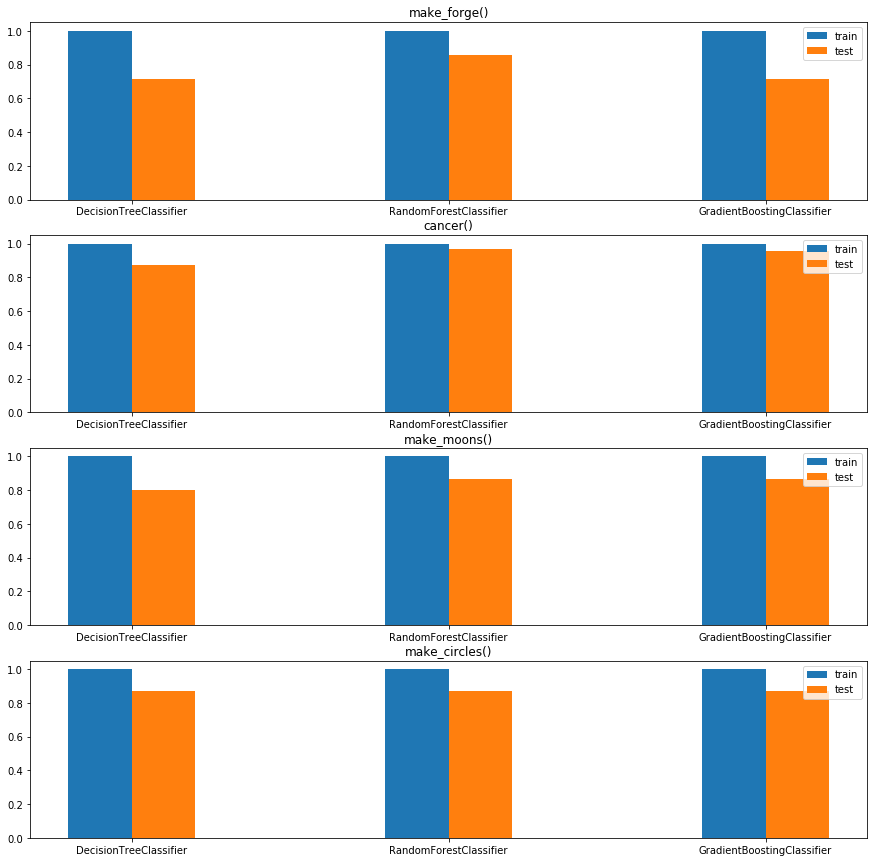

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
compare_tree_classification(X_train, X_test, y_train, y_test, title='make_forge()', ax=axes[0])

cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
compare_tree_classification(X_train, X_test, y_train, y_test, title='cancer()', ax=axes[1])

X, y = sklearn.datasets.make_moons(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
compare_tree_classification(X_train, X_test, y_train, y_test, title='make_moons()', ax=axes[2])

X, y = sklearn.datasets.make_circles(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
compare_tree_classification(X_train, X_test, y_train, y_test, title='make_circles()', ax=axes[3])

## Decision Tree 장단점
- 장점
    - 초보자들도 이해하기 쉽다
    - Visualize 쉽다
    - Overfit 제어도 쉽다: `max_depth`, `max_leaf_nodes`, `min_samples_leaf`
- 단점
    - Overfit 하기 쉽다
    - Poor performance

## Random Forest 장단점

- 장점
    - 모든 DT장점을 가짐
    - Overfit 덜함
- 단점
    - 당연히 더 많은 computation time with `n_jobs`
    - 첫 `random_state`에 따라 많은 차이
    - don't perform well for high dimensional, sparse data
    - 더 많은 튜닝이 필요: `n_estimators`, `max_features`

## GBRT 장단점
- 장점
    - 모든 DT 장점을 가짐
    - 겁나 잘되서 많이 쓰임
    - 스케일 가능 (e.g., `xgboost`)
- 단점
    - Requires careful tuing of parameters: `n_estimators`, `learning_rate`, `max_depth`